# eICU Collaborative Research Database

# Workshop 2: Exploring a single patient stay

Before starting this workshop, you will need to copy the eicu demo database file ('eicu_demo.sqlite3') to the `data` directory.

Documentation on the eICU Collaborative Research Database can be found at: http://eicu-crd.mit.edu/.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

In [2]:
# Plot settings
%matplotlib inline
plt.style.use('ggplot')
fontsize = 20 # size for x and y ticks
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams.update({'font.size': fontsize})

In [3]:
# Connect to the database
fn = os.path.join('data','eicu_demo.sqlite3')
con = sqlite3.connect(fn)
cur = con.cursor()

## 1. Display a list of tables

In [4]:
query = \
"""
SELECT type, name
FROM sqlite_master 
WHERE type='table'
ORDER BY name;
"""

list_of_tables = pd.read_sql_query(query,con)

In [5]:
list_of_tables

,type,name
0,table,admissiondrug
1,table,admissiondx
2,table,apacheapsvar
3,table,apachepatientresult
4,table,apachepredvar
5,table,careplancareprovider
6,table,careplaneol
7,table,careplangeneral
8,table,careplangoal
9,table,careplaninfectiousdisease


## 2. Selecting a single patient stay 

### 2.1. Patient admission details

The `patient` table includes general information about the patient admissions (for example, demographics, admission and discharge details). See: http://eicu-crd.mit.edu/eicutables/patient/

### Questions

Use your knowledge from the previous notebook and the online documentation (http://eicu-crd.mit.edu/) to answer the following questions:

- Which column in the `patient` table is distinct for each stay in the ICU (similar to `icustay_id` in MIMIC-III)?
- Which column is unique for each patient (similar to `subject_id` in MIMIC-III)?


In [6]:
# select a single ICU stay
patientunitstayid = 165840

In [7]:
# query to load data from the patient table
query = \
"""
SELECT *
FROM patient
WHERE patientunitstayid = {}
""".format(patientunitstayid)

print(query)


SELECT *
FROM patient
WHERE patientunitstayid = 165840



In [8]:
# run the query and assign the output to a variable
unitstay = pd.read_sql_query(query,con)

In [9]:
# display the first few rows of the dataframe
unitstay.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmityear,...,unitstaytype,admissionweight,dischargeweight,unitdischargeyear,unitdischargetime24,unitdischargetime,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,165840,148008,Male,81,Caucasian,61,120,"Arrest, respiratory (without cardiac arrest)",167,2015,...,admit,92.4,92.4,2015,23:48:00,midnight,75,Step-Down Unit (SDU),Alive,002-12363


In [10]:
# display a list of columns
unitstay.columns

Index([u'patientunitstayid', u'patienthealthsystemstayid', u'gender', u'age',
       u'ethnicity', u'hospitalid', u'wardid', u'apacheadmissiondx',
       u'admissionheight', u'hospitaladmityear', u'hospitaladmittime24',
       u'hospitaladmittime', u'hospitaladmitoffset', u'hospitaladmitsource',
       u'hospitaldischargeyear', u'hospitaldischargetime24',
       u'hospitaldischargetime', u'hospitaldischargeoffset',
       u'hospitaldischargelocation', u'hospitaldischargestatus', u'unittype',
       u'unitadmityear', u'unitadmittime24', u'unitadmittime',
       u'unitadmitsource', u'unitvisitnumber', u'unitstaytype',
       u'admissionweight', u'dischargeweight', u'unitdischargeyear',
       u'unitdischargetime24', u'unitdischargetime', u'unitdischargeoffset',
       u'unitdischargelocation', u'unitdischargestatus', u'uniquepid'],
      dtype='object')

In [11]:
# select a limited number of columns to view
columns = ['patientunitstayid','gender','age','unitdischargestatus']
unitstay[columns]

,patientunitstayid,gender,age,unitdischargestatus
0,165840,Male,81,Alive


In [12]:
unitstay.describe()

,patientunitstayid,patienthealthsystemstayid,hospitalid,wardid,admissionheight,hospitaladmityear,hospitaladmitoffset,hospitaldischargeyear,hospitaldischargeoffset,unitadmityear,unitvisitnumber,admissionweight,dischargeweight,unitdischargeyear,unitdischargeoffset
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,165840.0,148008.0,61.0,120.0,167.0,2015.0,0.0,2015.0,229.0,2015.0,1.0,92.4,92.4,2015.0,75.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,165840.0,148008.0,61.0,120.0,167.0,2015.0,0.0,2015.0,229.0,2015.0,1.0,92.4,92.4,2015.0,75.0
25%,165840.0,148008.0,61.0,120.0,167.0,2015.0,0.0,2015.0,229.0,2015.0,1.0,92.4,92.4,2015.0,75.0
50%,165840.0,148008.0,61.0,120.0,167.0,2015.0,0.0,2015.0,229.0,2015.0,1.0,92.4,92.4,2015.0,75.0
75%,165840.0,148008.0,61.0,120.0,167.0,2015.0,0.0,2015.0,229.0,2015.0,1.0,92.4,92.4,2015.0,75.0
max,165840.0,148008.0,61.0,120.0,167.0,2015.0,0.0,2015.0,229.0,2015.0,1.0,92.4,92.4,2015.0,75.0


### Questions

- What year was the patient admitted to the ICU? Which year was he or she discharged?
- What was the status of the patient upon discharge from the unit?

### 2.2. Periodic vital signs
 
The `vitalperiodic` table comprises data that is consistently interfaced from bedside vital signs monitors into eCareManager. Data are generally interfaced as 1 minute averages, and archived into the `vitalperiodic` table as 5 minute median values. For more detail, see: http://eicu-crd.mit.edu/eicutables/vitalPeriodic/

In [13]:
# query to load data from the patient table
query = \
"""
SELECT *
FROM vitalperiodic
WHERE patientunitstayid = {}
""".format(patientunitstayid)

print(query)


SELECT *
FROM vitalperiodic
WHERE patientunitstayid = 165840



In [14]:
# run the query and assign the output to a variable
vitalperiodic = pd.read_sql_query(query,con)

In [15]:
# display the first few rows of the dataframe
vitalperiodic.head()

,patientunitstayid,vitalperiodicid,observationyear,observationtime24,observationtime,observationoffset,temperature,sao2,heartrate,respiration,...,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
0,165840,60251863,2015,23:09:00,midnight,36,36.6,98,83,26.0,...,NaN,NaN,NaN,None,None,None,-0.10,-0.6,-0.50,None
1,165840,60252683,2015,23:14:00,midnight,41,36.3,97,85,29.0,...,NaN,NaN,NaN,None,None,None,NaN,NaN,-0.40,None
2,165840,60256671,2015,23:39:00,midnight,66,36.5,95,81,NaN,...,61.0,3.0,21.0,None,None,None,NaN,NaN,-0.40,None
3,165840,60250649,2015,22:59:00,midnight,26,NaN,98,86,26.0,...,NaN,NaN,NaN,None,None,None,-0.15,-0.6,-0.45,None
4,165840,60253070,2015,23:19:00,midnight,46,36.4,89,85,NaN,...,NaN,NaN,NaN,None,None,None,NaN,NaN,-0.40,None


In [16]:
# display a full list of columns
vitalperiodic.columns

Index([u'patientunitstayid', u'vitalperiodicid', u'observationyear',
       u'observationtime24', u'observationtime', u'observationoffset',
       u'temperature', u'sao2', u'heartrate', u'respiration', u'cvp', u'etco2',
       u'systemicsystolic', u'systemicdiastolic', u'systemicmean',
       u'pasystolic', u'padiastolic', u'pamean', u'st1', u'st2', u'st3',
       u'icp'],
      dtype='object')

In [17]:
# sort the values by the observationoffset (time in minutes from ICU admission)
vitalperiodic = vitalperiodic.sort_values(by='observationoffset')
vitalperiodic.head()

,patientunitstayid,vitalperiodicid,observationyear,observationtime24,observationtime,observationoffset,temperature,sao2,heartrate,respiration,...,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
3,165840,60250649,2015,22:59:00,midnight,26,NaN,98,86,26.0,...,NaN,NaN,NaN,None,None,None,-0.15,-0.6,-0.45,None
9,165840,60251596,2015,23:04:00,midnight,31,NaN,98,84,27.0,...,NaN,NaN,NaN,None,None,None,-0.10,-0.6,-0.40,None
0,165840,60251863,2015,23:09:00,midnight,36,36.6,98,83,26.0,...,NaN,NaN,NaN,None,None,None,-0.10,-0.6,-0.50,None
1,165840,60252683,2015,23:14:00,midnight,41,36.3,97,85,29.0,...,NaN,NaN,NaN,None,None,None,NaN,NaN,-0.40,None
4,165840,60253070,2015,23:19:00,midnight,46,36.4,89,85,NaN,...,NaN,NaN,NaN,None,None,None,NaN,NaN,-0.40,None


In [18]:
# subselect the variable columns
columns = ['observationoffset','temperature','sao2','heartrate','respiration',
          'cvp','etco2','systemicsystolic','systemicdiastolic','systemicmean',
          'pasystolic','padiastolic','pamean','st1','st2','st3','icp']

vitalperiodic = vitalperiodic[columns].set_index('observationoffset')
vitalperiodic.head()

,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
observationoffset,,,,,,,,,,,,,,,,
26,NaN,98,86,26.0,None,None,NaN,NaN,NaN,None,None,None,-0.15,-0.6,-0.45,None
31,NaN,98,84,27.0,None,None,NaN,NaN,NaN,None,None,None,-0.10,-0.6,-0.40,None
36,36.6,98,83,26.0,None,None,NaN,NaN,NaN,None,None,None,-0.10,-0.6,-0.50,None
41,36.3,97,85,29.0,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN,-0.40,None
46,36.4,89,85,NaN,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN,-0.40,None


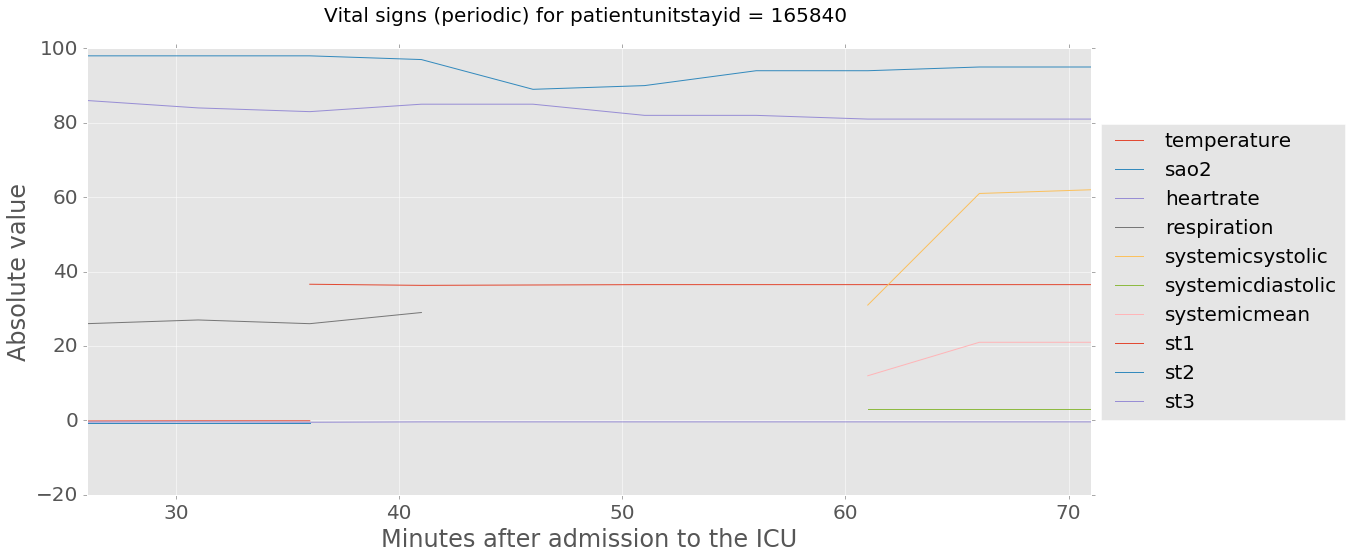

In [19]:
# plot the data
figsize = (18,8)
title = 'Vital signs (periodic) for patientunitstayid = {} \n'.format(patientunitstayid)
ax = vitalperiodic.plot(title=title, figsize=figsize, fontsize=fontsize)

ax.title.set_size(fontsize)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Minutes after admission to the ICU")
ax.set_ylabel("Absolute value")

### Questions

- ???

### 2.3. Aperiodic vital signs¶

The vitalAperiodic table provides invasive vital sign data that is recorded at irregular intervals. See: http://eicu-crd.mit.edu/eicutables/vitalAperiodic/

In [20]:
# query to load data from the patient table
query = \
"""
SELECT *
FROM vitalaperiodic
WHERE patientunitstayid = {}
""".format(patientunitstayid)

print(query)


SELECT *
FROM vitalaperiodic
WHERE patientunitstayid = 165840



In [21]:
# run the query and assign the output to a variable
vitalaperiodic = pd.read_sql_query(query,con)

In [22]:
# display the first few rows of the dataframe
vitalaperiodic.head()

,patientunitstayid,vitalaperiodicid,observationyear,observationtime24,observationtime,observationoffset,noninvasivesystolic,noninvasivediastolic,noninvasivemean,paop,cardiacoutput,cardiacinput,svr,svri,pvr,pvri
0,165840,447870,2015,23:03:00,midnight,30,129.0,61.0,88.0,None,None,None,None,None,None,None
1,165840,447871,2015,23:30:00,midnight,57,96.0,53.0,71.0,None,None,None,None,None,None,None


In [23]:
vitalaperiodic.columns

Index([u'patientunitstayid', u'vitalaperiodicid', u'observationyear',
       u'observationtime24', u'observationtime', u'observationoffset',
       u'noninvasivesystolic', u'noninvasivediastolic', u'noninvasivemean',
       u'paop', u'cardiacoutput', u'cardiacinput', u'svr', u'svri', u'pvr',
       u'pvri'],
      dtype='object')

In [24]:
# sort the values by the observationoffset (time in minutes from ICU admission)
vitalaperiodic = vitalaperiodic.sort_values(by='observationoffset')
vitalaperiodic.head()

,patientunitstayid,vitalaperiodicid,observationyear,observationtime24,observationtime,observationoffset,noninvasivesystolic,noninvasivediastolic,noninvasivemean,paop,cardiacoutput,cardiacinput,svr,svri,pvr,pvri
0,165840,447870,2015,23:03:00,midnight,30,129.0,61.0,88.0,None,None,None,None,None,None,None
1,165840,447871,2015,23:30:00,midnight,57,96.0,53.0,71.0,None,None,None,None,None,None,None


In [25]:
# subselect the variable columns
columns = ['observationoffset','noninvasivesystolic','noninvasivediastolic',
          'noninvasivemean','paop','cardiacoutput','cardiacinput','svr',
          'svri','pvr','pvri']

vitalaperiodic = vitalaperiodic[columns].set_index('observationoffset')
vitalaperiodic.head()

,noninvasivesystolic,noninvasivediastolic,noninvasivemean,paop,cardiacoutput,cardiacinput,svr,svri,pvr,pvri
observationoffset,,,,,,,,,,
30,129.0,61.0,88.0,None,None,None,None,None,None,None
57,96.0,53.0,71.0,None,None,None,None,None,None,None


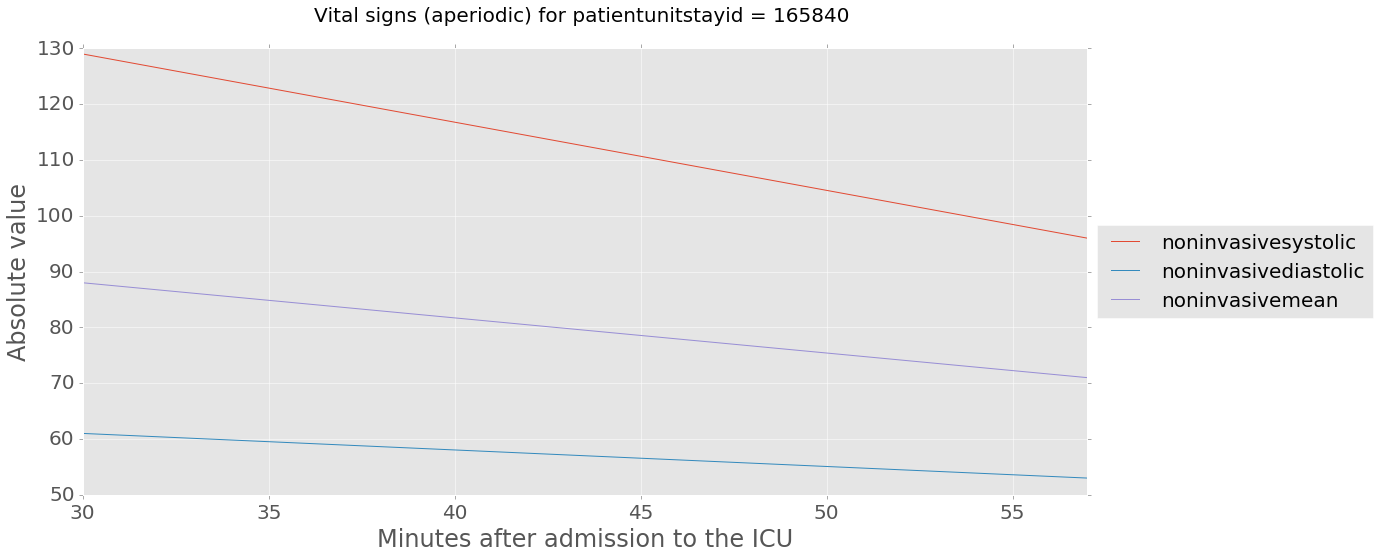

In [26]:
# plot the data
figsize = (18,8)
title = 'Vital signs (aperiodic) for patientunitstayid = {} \n'.format(patientunitstayid)
ax = vitalaperiodic.plot(title=title, figsize=figsize, fontsize=fontsize)

ax.title.set_size(fontsize)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel("Minutes after admission to the ICU")
ax.set_ylabel("Absolute value")

### Questions

- ???

### 2.5. Laboratory test results

In [27]:
# query to load data from the patient table
query = \
"""
SELECT *
FROM lab
WHERE patientunitstayid = {}
""".format(patientunitstayid)

print(query)


SELECT *
FROM lab
WHERE patientunitstayid = 165840



In [28]:
# run the query and assign the output to a variable
lab = pd.read_sql_query(query,con)

In [29]:
# display the first few rows of the dataframe
lab.head()

,patientunitstayid,labid,labresultyear,labresulttime24,labresulttime,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedyear,labresultrevisedtime24,labresultrevisedtime,labresultrevisedoffset
0,165840,53354277,2015,21:27:00,night,-66,3,PTT,28.0,28,sec,sec,2015,21:52:00,night,-41
1,165840,51868798,2015,21:27:00,night,-66,3,MCH,29.9,29.9,pg,pg,2015,21:41:00,night,-52
2,165840,48651576,2015,21:27:00,night,-66,1,creatinine,1.4,1.40,mg/dL,mg/dL,2015,21:54:00,night,-39
3,165840,67669439,2015,22:00:00,midnight,-33,7,paO2,87.0,87,mm Hg,mm Hg,2015,22:16:00,midnight,-17
4,165840,58981035,2015,21:27:00,night,-66,4,BNP,313.0,313,pg/mL,pg/mL,2015,22:06:00,midnight,-27


In [30]:
# list columns in the table
lab.columns

Index([u'patientunitstayid', u'labid', u'labresultyear', u'labresulttime24',
       u'labresulttime', u'labresultoffset', u'labtypeid', u'labname',
       u'labresult', u'labresulttext', u'labmeasurenamesystem',
       u'labmeasurenameinterface', u'labresultrevisedyear',
       u'labresultrevisedtime24', u'labresultrevisedtime',
       u'labresultrevisedoffset'],
      dtype='object')

In [31]:
# sort the values by the offset time (time in minutes from ICU admission)
lab = lab.sort_values(by='labresultoffset')
lab.head()

,patientunitstayid,labid,labresultyear,labresulttime24,labresulttime,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedyear,labresultrevisedtime24,labresultrevisedtime,labresultrevisedoffset
0,165840,53354277,2015,21:27:00,night,-66,3,PTT,28.0,28,sec,sec,2015,21:52:00,night,-41
21,165840,51868797,2015,21:27:00,night,-66,3,RDW,15.6,15.6,%,%,2015,21:41:00,night,-52
22,165840,48651579,2015,21:27:00,night,-66,1,AST (SGOT),24.0,24,Units/L,Units/L,2015,21:54:00,night,-39
24,165840,48651584,2015,21:27:00,night,-66,1,calcium,8.5,8.5,mg/dL,mg/dL,2015,21:54:00,night,-39
25,165840,51868795,2015,21:27:00,night,-66,3,Hgb,10.7,10.7,g/dL,g/dL,2015,21:41:00,night,-52


In [32]:
# subselect the variable columns
columns = ['labresultoffset','labname','labresult','labmeasurenamesystem']

lab = lab[columns].set_index('labresultoffset')
lab.head()

,labname,labresult,labmeasurenamesystem
labresultoffset,,,
-66,PTT,28.0,sec
-66,RDW,15.6,%
-66,AST (SGOT),24.0,Units/L
-66,calcium,8.5,mg/dL
-66,Hgb,10.7,g/dL


In [57]:
# list the distinct labnames
lab['labname'].unique()

array([u'PTT', u'RDW', u'AST (SGOT)', u'calcium', u'Hgb', u'total protein',
       u'-monos', u'albumin', u'alkaline phos.', u'MCV', u'-polys', u'BUN',
       u'-basos', u'ALT (SGPT)', u'RBC', u'chloride', u'-eos',
       u'bicarbonate', u'glucose', u'Hct', u'-lymphs', u'MCH',
       u'creatinine', u'BNP', u'WBC x 1000', u'troponin - I', u'PT - INR',
       u'anion gap', u'platelets x 1000', u'PT', u'MCHC', u'sodium',
       u'potassium', u'total bilirubin', u'LPM O2', u'HCO3', u'paCO2',
       u'paO2', u'Base Excess', u'pH'], dtype=object)

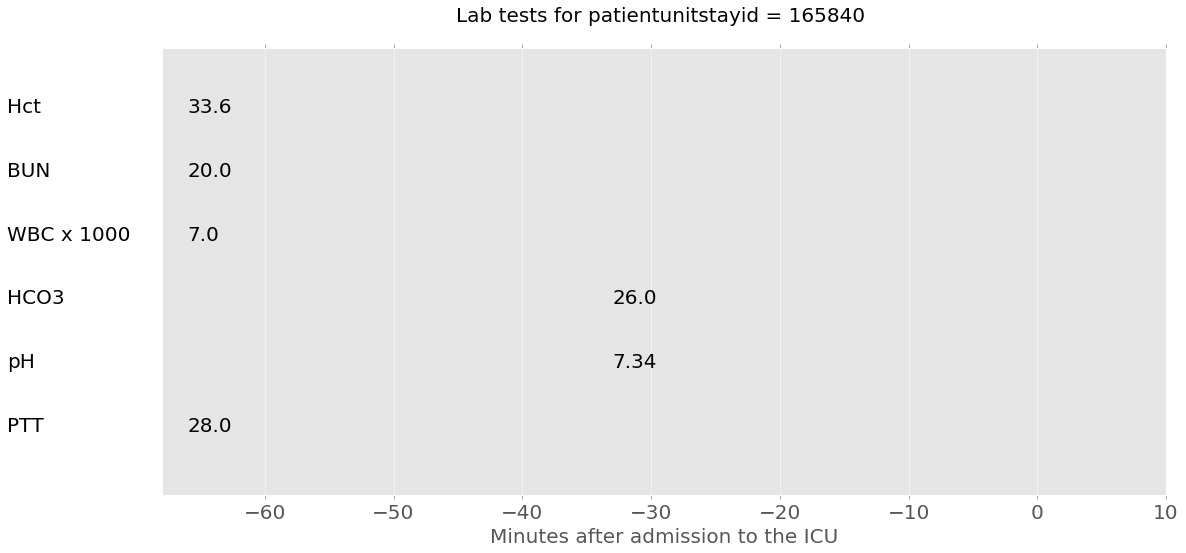

In [140]:
# plot selected labs
labs_to_plot = ['PTT','pH','HCO3','WBC x 1000', 'BUN', 'Hct']

# set the range of the axes
xmin = lab.index.min()-2
xmax = max(lab.index.max(),10)
ymin = 0
ymax = len(labs_to_plot) + 1
yaxis_loc = xmin-max(len(s) for s in labs_to_plot)-2

# set the figure size
figsize = (18,8)
plt.figure(figsize=figsize)
plt.axis([xmin, xmax, ymin, ymax])

# plot the values
for n_height,la in enumerate(labs_to_plot):
    ax = plt.text(yaxis_loc,n_height+1,la,fontsize=fontsize)
    for i, txt in enumerate(lab.labresult[lab.labname==la].values):
            plt.annotate(txt, (lab.index[lab.labname==la].values[i],n_height+1), fontsize=fontsize)

ax.axes.get_yaxis().set_visible(False)
plt.xlabel("Minutes after admission to the ICU", fontsize=fontsize)
plt.title('Lab tests for patientunitstayid = {} \n'.format(patientunitstayid),
          fontsize=fontsize)

### 2.4. Infusion drugs

In [ ]:
# query to load data from the patient table
query = \
"""
SELECT *
FROM infusiondrug
WHERE patientunitstayid = {}
""".format(patientunitstayid)

print(query)

In [ ]:
# run the query and assign the output to a variable
infusiondrug = pd.read_sql_query(query,con)

In [ ]:
# display the first few rows of the dataframe
infusiondrug.head()